In [30]:
import pandas as pd
import numpy as np
import matplotlib as plt
import statsmodels.api as sm
import scipy.stats as stats
from pylab import *
from scipy.io import loadmat

In [41]:
df=pd.read_csv("atlantic.csv",parse_dates=['Date Time'] , header=int(0))

In [65]:
df.head()

,Date Time,Water Level,Sigma,I,L
0,2016-01-01 00:00:00,0.888,0.210,0,0
1,2016-01-01 01:00:00,1.440,0.249,0,0
2,2016-01-01 02:00:00,2.066,0.285,0,0
3,2016-01-01 03:00:00,2.578,0.305,0,0
4,2016-01-01 04:00:00,3.270,0.262,0,0


In [66]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Date Time       0
 Water Level    0
 Sigma          0
 I              0
 L              0
dtype: int64

In [67]:
df_clean = df.dropna()

In [68]:

df_clean.head(11)

,Date Time,Water Level,Sigma,I,L
0,2016-01-01 00:00:00,0.888,0.210,0,0
1,2016-01-01 01:00:00,1.440,0.249,0,0
2,2016-01-01 02:00:00,2.066,0.285,0,0
3,2016-01-01 03:00:00,2.578,0.305,0,0
4,2016-01-01 04:00:00,3.270,0.262,0,0
5,2016-01-01 05:00:00,3.733,0.292,0,0
6,2016-01-01 06:00:00,3.536,0.302,0,0
7,2016-01-01 07:00:00,3.047,0.249,0,0
8,2016-01-01 08:00:00,2.312,0.236,0,0
9,2016-01-01 09:00:00,1.705,0.230,0,0


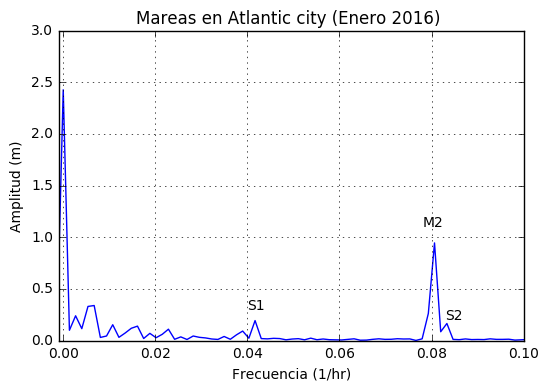

In [110]:
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
N = 744
# sample spacing
T = 1
x = df['Date Time']
y = df[' Water Level']
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.xlim(-0.001, .1)
plt.ylim(0,3)


plt.grid()
plt.title(u'Mareas en Atlantic city (Enero 2016) ')  # Colocamos el título del gráfico
plt.xlabel('Frecuencia (1/hr)')  # Colocamos la etiqueta en el eje x
plt.ylabel('Amplitud (m)')  # Colocamos la etiqueta en el eje y

plt.text(.040,.3,"S1")
plt.text(.083,.2,"S2")
plt.text(.078,1.1,"M2")

plt.show()

In [70]:
A=yf/N

In [71]:
B=np.absolute(A)

In [90]:

print(np.where(B[:,]>0.05))
B[B[:,]>.05]


(array([  0,   1,   2,   3,   4,   5,   8,  10,  11,  12,  14,  16,  17,
        28,  29,  31,  59,  60,  61,  62, 682, 683, 684, 685, 713, 715,
       716, 727, 728, 730, 732, 733, 734, 736, 739, 740, 741, 742, 743]),)


array([ 2.42608199,  0.09916212,  0.2390481 ,  0.11454139,  0.32965573,
        0.33855658,  0.15278   ,  0.07206817,  0.11818248,  0.13910754,
        0.069153  ,  0.05980407,  0.10938833,  0.05491098,  0.09130525,
        0.19282184,  0.2614691 ,  0.94425598,  0.08466055,  0.1646898 ,
        0.1646898 ,  0.08466055,  0.94425598,  0.2614691 ,  0.19282184,
        0.09130525,  0.05491098,  0.10938833,  0.05980407,  0.069153  ,
        0.13910754,  0.11818248,  0.07206817,  0.15278   ,  0.33855658,
        0.32965573,  0.11454139,  0.2390481 ,  0.09916212])

In [93]:
print( '0')
print('Amplitud=',np.absolute(yf[0,]/N))
print('frecuencia=', xf[int(N/2 +0),])
print('periodo=', 1/xf[int(N/2 +0),])
print()
print( '1')
print('Amplitud=',np.absolute(yf[1,]/N))
print('frecuencia=', xf[int(N/2 +1),])
print('periodo=', 1/xf[int(N/2 +1),])
print()
print( '2')
print('Amplitud=',np.absolute(yf[2,]/N))
print('frecuencia=', xf[int(N/2 +2),])
print('periodo=', 1/xf[int(N/2 +2),])
print()
print( '3')
print('Amplitud=',np.absolute(yf[3,]/N))
print('frecuencia=', xf[int(N/2 +3),])
print('periodo=', 1/xf[int(N/2 +3),])
print()
print( '4')
print('Amplitud=',np.absolute(yf[4,]/N))
print('frecuencia=', xf[int(N/2 +4),])
print('periodo=', 1/xf[int(N/2 +4),])
print()
print( '5')
print('Amplitud=',np.absolute(yf[5,]/N))
print('frecuencia=', xf[int(N/2 +5),])
print('periodo=', 1/xf[int(N/2 +5),])
print()
print( '8')
print('Amplitud=',np.absolute(yf[8,]/N))
print('frecuencia=', xf[int(N/2 +8),])
print('periodo=', 1/xf[int(N/2 +8),])
print()
print( '10')
print('Amplitud=',np.absolute(yf[10,]/N))
print('frecuencia=', xf[int(N/2 +10),])
print('periodo=', 1/xf[int(N/2 +10),])
print()
print( '11')
print('Amplitud=',np.absolute(yf[11,]/N))
print('frecuencia=', xf[int(N/2 +11),])
print('periodo=', 1/xf[int(N/2 +11),])
print()
print( '12')
print('Amplitud=',np.absolute(yf[12,]/N))
print('frecuencia=', xf[int(N/2 +12),])
print('periodo=', 1/xf[int(N/2 +12),])
print()
print( '14')
print('Amplitud=',np.absolute(yf[14,]/N))
print('frecuencia=', xf[int(N/2 +14),])
print('periodo=', 1/xf[int(N/2 +14),])
print()
print( '16')
print('Amplitud=',np.absolute(yf[16,]/N))
print('frecuencia=', xf[int(N/2 +16),])
print('periodo=', 1/xf[int(N/2 +16),])
print()
print( '17')
print('Amplitud=',np.absolute(yf[17,]/N))
print('frecuencia=', xf[int(N/2 +17),])
print('periodo=', 1/xf[int(N/2 +17),])
print()
print( '28')
print('Amplitud=',np.absolute(yf[28,]/N))
print('frecuencia=', xf[int(N/2 +28),])
print('periodo=', 1/xf[int(N/2 +28),])
print()
print( '29')
print('Amplitud=',np.absolute(yf[29,]/N))
print('frecuencia=', xf[int(N/2 +29),])
print('periodo=', 1/xf[int(N/2 +29),])
print()
print( '31----s1')
print('Amplitud=',np.absolute(yf[31,]/N))
print('frecuencia=', xf[int(N/2 +31),])
print('periodo=', 1/xf[int(N/2 +31),])
print()
print( '59----v2')
print('Amplitud=',np.absolute(yf[59,]/N))
print('frecuencia=', xf[int(N/2 +59),])
print('periodo=', 1/xf[int(N/2 +59),])
print()
print( '60----M2')
print('Amplitud=',np.absolute(yf[60,]/N))
print('frecuencia=', xf[int(N/2 +60),])
print('periodo=', 1/xf[int(N/2 +60),])
print()
print( '61----L2')
print('Amplitud=',np.absolute(yf[61,]/N))
print('frecuencia=', xf[int(N/2 +61),])
print('periodo=', 1/xf[int(N/2 +61),])
print()
print( '62----s2')
print('Amplitud=',np.absolute(yf[62,]/N))
print('frecuencia=', xf[int(N/2 +62),])
print('periodo=', 1/xf[int(N/2 +62),])
print()

0
Amplitud= 2.42608198925
frecuencia= 0.0
periodo= inf

1
Amplitud= 0.0991621208059
frecuencia= 0.00134408602151
periodo= 744.0

2
Amplitud= 0.239048102044
frecuencia= 0.00268817204301
periodo= 372.0

3
Amplitud= 0.114541385505
frecuencia= 0.00403225806452
periodo= 248.0

4
Amplitud= 0.329655730207
frecuencia= 0.00537634408602
periodo= 186.0

5
Amplitud= 0.338556578237
frecuencia= 0.00672043010753
periodo= 148.8

8
Amplitud= 0.152780001725
frecuencia= 0.010752688172
periodo= 93.0

10
Amplitud= 0.0720681741454
frecuencia= 0.0134408602151
periodo= 74.4

11
Amplitud= 0.118182478139
frecuencia= 0.0147849462366
periodo= 67.6363636364

12
Amplitud= 0.139107536697
frecuencia= 0.0161290322581
periodo= 62.0

14
Amplitud= 0.0691530031408
frecuencia= 0.0188172043011
periodo= 53.1428571429

16
Amplitud= 0.0598040746177
frecuencia= 0.0215053763441
periodo= 46.5

17
Amplitud= 0.109388325197
frecuencia= 0.0228494623656
periodo= 43.7647058824

28
Amplitud= 0.0549109789182
frecuencia= 0.0376344086022
p